# Initializing Data

In [1]:
zip_path = '/content/drive/My\ Drive/Deep_Learning/bottle-updated.csv.zip'
!cp {zip_path} /content/
!cd /content/
!unzip -q /content/bottle-updated.csv.zip -d /content
!rm /content/bottle-updated.csv.zip

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sb

In [3]:
dataset = pd.read_csv('/content/bottle-updated.csv')

dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,864863.0,432431.000000,249664.587267,0.000,216215.500,432431.000,648646.5000,864862.000
Depthm,864863.0,226.831951,316.050259,0.000,46.000,125.000,300.0000,5351.000
T_degC,853900.0,10.799677,4.243825,1.440,7.680,10.060,13.8800,31.140
Salnty,817509.0,33.840350,0.461843,28.431,33.488,33.863,34.1969,37.034


In [4]:
dataset.head()

,Unnamed: 0,Depthm,T_degC,Salnty
0,0,0,10.50,33.440
1,1,8,10.46,33.440
2,2,10,10.46,33.437
3,3,19,10.45,33.420
4,4,20,10.45,33.421


In [5]:
dataset.drop(dataset.columns[0], axis=1, inplace=True)

In [6]:
dataset.tail()

,Depthm,T_degC,Salnty
864858,0,18.744,33.4083
864859,2,18.744,33.4083
864860,5,18.692,33.4150
864861,10,18.161,33.4062
864862,15,17.533,33.3880


In [7]:
dataset.replace('?', np.NaN, inplace=True)

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864863 entries, 0 to 864862
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Depthm  864863 non-null  int64  
 1   T_degC  853900 non-null  float64
 2   Salnty  817509 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 19.8 MB


In [9]:
dataset.isnull().sum()

Depthm        0
T_degC    10963
Salnty    47354
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa322f0def0>,
      dtype=object)

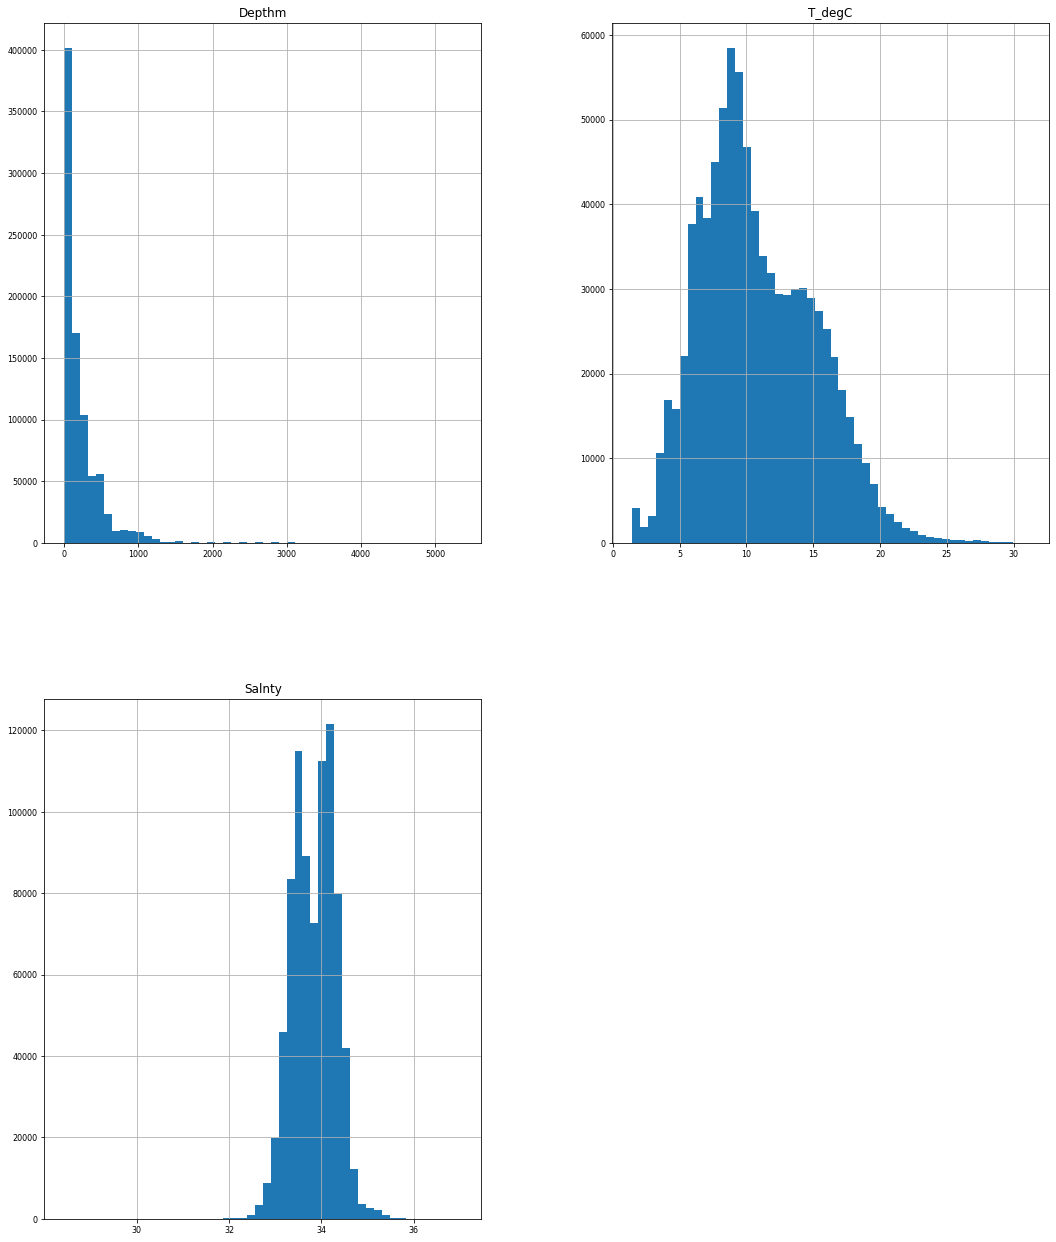

In [10]:
dataset.hist(figsize=(18, 22), bins=50, xlabelsize=8, ylabelsize=8)

In [11]:
#Fill NAN

med_t = dataset['T_degC'].median(axis=0)
avg_sal = dataset['Salnty'].mean(axis=0)

dataset['T_degC'].replace(np.nan, med_t, inplace=True)
dataset['Salnty'].replace(np.nan, avg_sal, inplace=True)

In [12]:
dataset.isnull().sum()

Depthm    0
T_degC    0
Salnty    0
dtype: int64

In [13]:
corr = dataset.corr()

corr

,Depthm,T_degC,Salnty
Depthm,1.000000,-0.677582,0.543326
T_degC,-0.677582,1.000000,-0.489510
Salnty,0.543326,-0.489510,1.000000


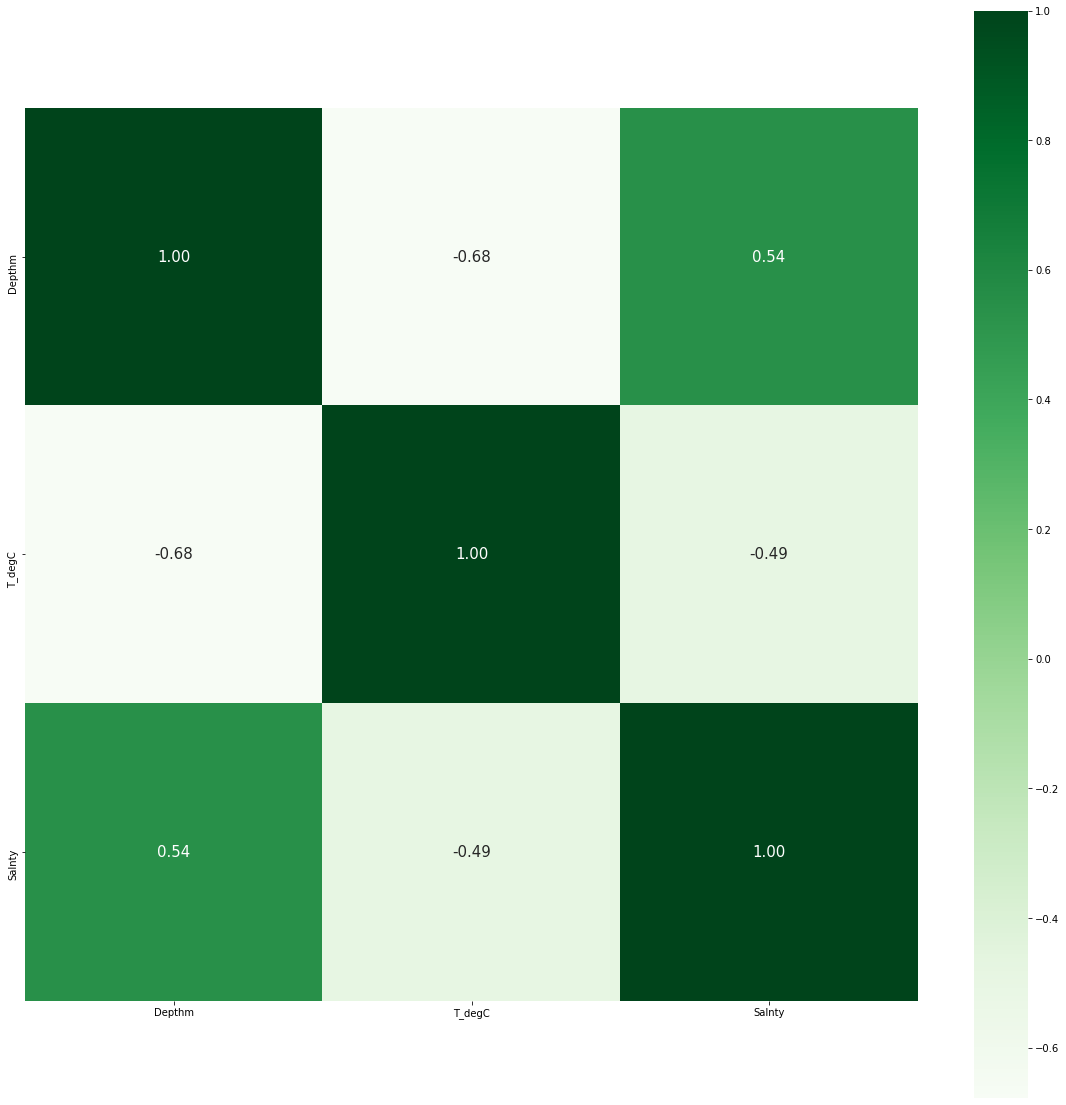

In [14]:
plt.figure(figsize=(20,20))
sb.heatmap(corr, cbar=True, square= True, fmt='.2f', annot=True, annot_kws={'size':15}, cmap='Greens')

# Linear Regression

## Feature Engineering

In [15]:
feature = dataset.drop(['Salnty'], axis=1)
label = dataset['Salnty']

In [16]:
from sklearn.preprocessing import QuantileTransformer
scaler = QuantileTransformer()

feature = scaler.fit_transform(feature.values)
label = scaler.fit_transform(label.values.reshape(-1,1)).flatten()

In [17]:
from sklearn.model_selection import train_test_split
feature_train, feature_test, label_train, label_test = train_test_split(feature, label, test_size=0.25, random_state=10)

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

lm = LinearRegression()
lm.fit(feature_train, label_train)

predictions = lm.predict(feature_test)

mse = mean_squared_error(label_test, predictions)
mae = mean_absolute_error(label_test, predictions)
r2 = r2_score(label_test, predictions)
print("MSE (Mean Squared Error)", mse)
print("MAE (Mean Absolute Error)", mae)
print("r^2 score", r2)
print('RMSE (Root Mean Squared Error', np.sqrt(mean_squared_error(label_test, predictions)))

MSE (Mean Squared Error) 0.03692189896232017
MAE (Mean Absolute Error) 0.1429948253384655
r^2 score 0.558017480304523
RMSE (Root Mean Squared Error 0.19215071939058717


# Deep Learning MLP

In [19]:
# Based on: https://machinelearningmastery.com/regression-tutorial-keras-deep-learning-library-python/
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(13, input_dim=2, kernel_initializer='normal', activation='relu')) # 8 neuron, sesuai dengan 8 feature
model.add(Dense(1, kernel_initializer='normal'))

model.compile(loss='mean_squared_error', optimizer='adam')

In [20]:
history_mlp = model.fit(x=feature_train, y=label_train, validation_data=(feature_test, label_test), epochs=50, batch_size=8)

Epoch 1/50
81081/81081 [==============================] - 101s 1ms/step - loss: 0.0329 - val_loss: 0.0323
Epoch 2/50
81081/81081 [==============================] - 91s 1ms/step - loss: 0.0322 - val_loss: 0.0325
Epoch 3/50
81081/81081 [==============================] - 86s 1ms/step - loss: 0.0322 - val_loss: 0.0325
Epoch 4/50
81081/81081 [==============================] - 99s 1ms/step - loss: 0.0307 - val_loss: 0.0291
Epoch 5/50
81081/81081 [==============================] - 89s 1ms/step - loss: 0.0280 - val_loss: 0.0276
Epoch 6/50
81081/81081 [==============================] - 86s 1ms/step - loss: 0.0273 - val_loss: 0.0271
Epoch 7/50
81081/81081 [==============================] - 96s 1ms/step - loss: 0.0271 - val_loss: 0.0274
Epoch 8/50
81081/81081 [==============================] - 96s 1ms/step - loss: 0.0270 - val_loss: 0.0283
Epoch 9/50
81081/81081 [==============================] - 90s 1ms/step - loss: 0.0270 - val_loss: 0.0273
Epoch 10/50
81081/81081 [=============================

In [21]:
predictions = model.predict(feature_test)

predictions = predictions.flatten()

In [22]:
mse = mean_squared_error(label_test, predictions)
mae = mean_absolute_error(label_test, predictions)
r2 = r2_score(label_test, predictions)
print("MSE (Mean Squared Error)", mse)
print("MAE (Mean Absolute Error)", mae)
print("r^2 score", r2)
print('RMSE (Root Mean Squared Error', np.sqrt(mean_squared_error(label_test, predictions)))

MSE (Mean Squared Error) 0.027303565591776196
MAE (Mean Absolute Error) 0.1172915665321385
r^2 score 0.6731560657473389
RMSE (Root Mean Squared Error 0.16523790603785862


# Deeper Model

In [23]:
deeper_model = Sequential()
deeper_model.add(Dense(13, input_dim=2, kernel_initializer='normal', activation='relu'))
deeper_model.add(Dense(6, kernel_initializer='normal', activation='relu'))
deeper_model.add(Dense(1, kernel_initializer='normal'))

deeper_model.compile(loss='mean_squared_error', optimizer='adam')

history_deeper = deeper_model.fit(x=feature_train, y=label_train, validation_data=(feature_test, label_test), epochs=50, batch_size=8)

Epoch 1/50
81081/81081 [==============================] - 102s 1ms/step - loss: 0.0321 - val_loss: 0.0294
Epoch 2/50
81081/81081 [==============================] - 104s 1ms/step - loss: 0.0283 - val_loss: 0.0281
Epoch 3/50
81081/81081 [==============================] - 99s 1ms/step - loss: 0.0279 - val_loss: 0.0284
Epoch 4/50
81081/81081 [==============================] - 100s 1ms/step - loss: 0.0278 - val_loss: 0.0294
Epoch 5/50
81081/81081 [==============================] - 101s 1ms/step - loss: 0.0278 - val_loss: 0.0283
Epoch 6/50
81081/81081 [==============================] - 102s 1ms/step - loss: 0.0278 - val_loss: 0.0276
Epoch 7/50
81081/81081 [==============================] - 109s 1ms/step - loss: 0.0276 - val_loss: 0.0284
Epoch 8/50
81081/81081 [==============================] - 110s 1ms/step - loss: 0.0273 - val_loss: 0.0266
Epoch 9/50
81081/81081 [==============================] - 101s 1ms/step - loss: 0.0264 - val_loss: 0.0275
Epoch 10/50
81081/81081 [======================

In [24]:
predictions = deeper_model.predict(feature_test)

predictions = predictions.flatten()

In [25]:
mse = mean_squared_error(label_test, predictions)
mae = mean_absolute_error(label_test, predictions)
r2 = r2_score(label_test, predictions)
print("MSE (Mean Squared Error)", mse)
print("MAE (Mean Absolute Error)", mae)
print("r^2 score", r2)
print('RMSE (Root Mean Squared Error', np.sqrt(mean_squared_error(label_test, predictions)))

MSE (Mean Squared Error) 0.023957087265366633
MAE (Mean Absolute Error) 0.11201864340889378
r^2 score 0.7132158937730384
RMSE (Root Mean Squared Error 0.1547807716267322


# Wider Model

In [26]:
from tensorflow.keras.optimizers import Adam
wider_model = Sequential()
wider_model.add(Dense(20, input_dim=2, kernel_initializer='normal', activation='relu'))
wider_model.add(Dense(1, kernel_initializer='normal'))

opt = Adam(lr=0.001)
wider_model.compile(loss='mean_squared_error', optimizer=opt)

history = wider_model.fit(x=feature_train, y=label_train, validation_data=(feature_test, label_test), epochs=100, batch_size=8)

Epoch 1/100
81081/81081 [==============================] - 90s 1ms/step - loss: 0.0328 - val_loss: 0.0316
Epoch 2/100
81081/81081 [==============================] - 90s 1ms/step - loss: 0.0288 - val_loss: 0.0284
Epoch 3/100
81081/81081 [==============================] - 96s 1ms/step - loss: 0.0281 - val_loss: 0.0289
Epoch 4/100
81081/81081 [==============================] - 102s 1ms/step - loss: 0.0280 - val_loss: 0.0278
Epoch 5/100
81081/81081 [==============================] - 95s 1ms/step - loss: 0.0279 - val_loss: 0.0278
Epoch 6/100
81081/81081 [==============================] - 103s 1ms/step - loss: 0.0279 - val_loss: 0.0283
Epoch 7/100
81081/81081 [==============================] - 94s 1ms/step - loss: 0.0279 - val_loss: 0.0283
Epoch 8/100
81081/81081 [==============================] - 92s 1ms/step - loss: 0.0275 - val_loss: 0.0271
Epoch 9/100
81081/81081 [==============================] - 93s 1ms/step - loss: 0.0270 - val_loss: 0.0269
Epoch 10/100
81081/81081 [==================

In [27]:
predictions = wider_model.predict(feature_test)

predictions = predictions.flatten()

In [28]:
mse = mean_squared_error(label_test, predictions)
mae = mean_absolute_error(label_test, predictions)
r2 = r2_score(label_test, predictions)
print("MSE (Mean Squared Error)", mse)
print("MAE (Mean Absolute Error)", mae)
print("r^2 score", r2)
print('RMSE (Root Mean Squared Error', np.sqrt(mean_squared_error(label_test, predictions)))

MSE (Mean Squared Error) 0.026783073340132593
MAE (Mean Absolute Error) 0.11808201353432451
r^2 score 0.6793867441070349
RMSE (Root Mean Squared Error 0.16365534925608938


In [29]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss (MSE)')
  plt.legend()
  plt.grid(True)

In [30]:
history_dataframe = pd.DataFrame(history.history)
history_dataframe['epoch'] = history.epoch
history_dataframe.sort_values(by='val_loss', ascending=True)

,loss,val_loss,epoch
85,0.025547,0.025289,85
30,0.025430,0.025307,30
98,0.025509,0.025340,98
92,0.025525,0.025352,92
64,0.025599,0.025353,64
...,...,...,...
5,0.027868,0.028270,5
6,0.027850,0.028335,6
1,0.028844,0.028417,1
2,0.028118,0.028919,2


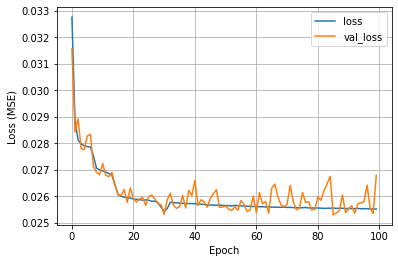

In [31]:
plot_loss(history) # epoch vs loss graph

In [32]:
from tensorflow.keras.optimizers import SGD

wider_model_tuned = Sequential()
wider_model_tuned.add(Dense(20, input_dim=2, kernel_initializer='normal', activation='relu'))
wider_model_tuned.add(Dense(1, kernel_initializer='normal'))

opt = SGD(lr=0.001, momentum=0.9)

wider_model_tuned.compile(loss='mean_squared_error', optimizer=opt)

wider_model_tuned.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 20)                60        
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 21        
Total params: 81
Trainable params: 81
Non-trainable params: 0
_________________________________________________________________


In [33]:
history_tuned = wider_model_tuned.fit(x=feature_train, y=label_train, validation_data=(feature_test, label_test), epochs=100, batch_size=8)

Epoch 1/100
81081/81081 [==============================] - 97s 1ms/step - loss: 0.0331 - val_loss: 0.0303
Epoch 2/100
81081/81081 [==============================] - 93s 1ms/step - loss: 0.0280 - val_loss: 0.0268
Epoch 3/100
81081/81081 [==============================] - 91s 1ms/step - loss: 0.0264 - val_loss: 0.0263
Epoch 4/100
81081/81081 [==============================] - 94s 1ms/step - loss: 0.0261 - val_loss: 0.0261
Epoch 5/100
81081/81081 [==============================] - 92s 1ms/step - loss: 0.0260 - val_loss: 0.0261
Epoch 6/100
81081/81081 [==============================] - 90s 1ms/step - loss: 0.0257 - val_loss: 0.0256
Epoch 7/100
81081/81081 [==============================] - 88s 1ms/step - loss: 0.0255 - val_loss: 0.0254
Epoch 8/100
81081/81081 [==============================] - 93s 1ms/step - loss: 0.0253 - val_loss: 0.0256
Epoch 9/100
81081/81081 [==============================] - 90s 1ms/step - loss: 0.0252 - val_loss: 0.0253
Epoch 10/100
81081/81081 [====================

In [34]:
predictions = wider_model_tuned.predict(feature_test)

predictions = predictions.flatten()

In [35]:
mse = mean_squared_error(label_test, predictions)
mae = mean_absolute_error(label_test, predictions)
r2 = r2_score(label_test, predictions)
print("MSE (Mean Squared Error)", mse)
print("MAE (Mean Absolute Error)", mae)
print("r^2 score", r2)
print('RMSE (Root Mean Squared Error', np.sqrt(mean_squared_error(label_test, predictions)))

MSE (Mean Squared Error) 0.02393524968810204
MAE (Mean Absolute Error) 0.11258114916764098
r^2 score 0.7134773057722776
RMSE (Root Mean Squared Error 0.1547102119709686


In [36]:
history_tuned_dataframe = pd.DataFrame(history_tuned.history)
history_tuned_dataframe['epoch'] = history_tuned.epoch
history_tuned_dataframe.sort_values(by='val_loss', ascending=True)

,loss,val_loss,epoch
75,0.024025,0.023870,75
92,0.024011,0.023876,92
76,0.024022,0.023885,76
98,0.023996,0.023894,98
94,0.024007,0.023899,94
...,...,...,...
4,0.025972,0.026084,4
3,0.026147,0.026117,3
2,0.026390,0.026316,2
1,0.028039,0.026836,1


In [37]:
from tensorflow.keras.optimizers import RMSprop

wider_model_rmsprop = Sequential()
wider_model_rmsprop.add(Dense(20, input_dim=2, kernel_initializer='normal', activation='relu'))
wider_model_rmsprop.add(Dense(1, kernel_initializer='normal'))

opt = RMSprop(lr=0.001)

wider_model_rmsprop.compile(loss='mean_squared_error', optimizer=opt)

wider_model_rmsprop.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 20)                60        
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 21        
Total params: 81
Trainable params: 81
Non-trainable params: 0
_________________________________________________________________


In [38]:
history_rmsprop = wider_model_rmsprop.fit(x=feature_train, y=label_train, validation_data=(feature_test, label_test), epochs=100, batch_size=8)

Epoch 1/100
81081/81081 [==============================] - 94s 1ms/step - loss: 0.0329 - val_loss: 0.0326
Epoch 2/100
81081/81081 [==============================] - 90s 1ms/step - loss: 0.0302 - val_loss: 0.0286
Epoch 3/100
81081/81081 [==============================] - 88s 1ms/step - loss: 0.0280 - val_loss: 0.0276
Epoch 4/100
81081/81081 [==============================] - 95s 1ms/step - loss: 0.0274 - val_loss: 0.0274
Epoch 5/100
81081/81081 [==============================] - 103s 1ms/step - loss: 0.0273 - val_loss: 0.0270
Epoch 6/100
81081/81081 [==============================] - 94s 1ms/step - loss: 0.0272 - val_loss: 0.0269
Epoch 7/100
81081/81081 [==============================] - 93s 1ms/step - loss: 0.0272 - val_loss: 0.0270
Epoch 8/100
81081/81081 [==============================] - 91s 1ms/step - loss: 0.0271 - val_loss: 0.0271
Epoch 9/100
81081/81081 [==============================] - 89s 1ms/step - loss: 0.0271 - val_loss: 0.0267
Epoch 10/100
81081/81081 [===================

In [39]:
predictions = wider_model_rmsprop.predict(feature_test)

predictions = predictions.flatten()

In [40]:
mse = mean_squared_error(label_test, predictions)
mae = mean_absolute_error(label_test, predictions)
r2 = r2_score(label_test, predictions)
print("MSE (Mean Squared Error)", mse)
print("MAE (Mean Absolute Error)", mae)
print("r^2 score", r2)
print('RMSE (Root Mean Squared Error', np.sqrt(mean_squared_error(label_test, predictions)))

MSE (Mean Squared Error) 0.026037439783973153
MAE (Mean Absolute Error) 0.12506944924410146
r^2 score 0.6883125308943605
RMSE (Root Mean Squared Error 0.16136120904347845


In [41]:
history_rmsprop_dataframe = pd.DataFrame(history_rmsprop.history)
history_rmsprop_dataframe['epoch'] = history_rmsprop.epoch
history_rmsprop_dataframe.sort_values(by='val_loss', ascending=True)

,loss,val_loss,epoch
98,0.025652,0.024881,98
88,0.025866,0.025195,88
94,0.025823,0.025273,94
96,0.025719,0.025289,96
92,0.025839,0.025322,92
...,...,...,...
1,0.030204,0.028627,1
46,0.026003,0.029145,46
81,0.025881,0.029536,81
55,0.025971,0.030141,55


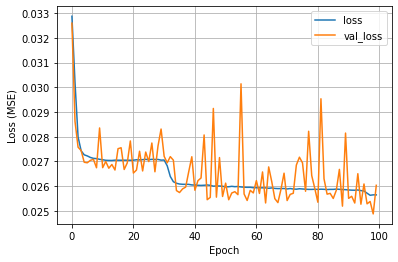

In [42]:
plot_loss(history_rmsprop)

# Kesimpulan
Hasil terbaik diperoleh dengan model wider SGD tuned dengan akurasi sebesar 0.7135 dan MSE sebesar 0.0239. Dari model deeper model juga diperoleh hasil yang cukup mirip tetapi tidak lebih besar dari model wider SGD tuned.